In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

# Loading and exploring data

In [2]:
#retrieving the data
dataset = pd.read_csv("lalonde.csv")
dataset

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,1,33,8,1,0,0,1,0.0,0.0,289.7899
...,...,...,...,...,...,...,...,...,...,...
609,0,18,11,0,0,0,1,0.0,0.0,10150.5000
610,0,24,1,0,1,1,1,0.0,0.0,19464.6100
611,0,21,18,0,0,0,0,0.0,0.0,0.0000
612,0,32,5,1,0,1,1,0.0,0.0,187.6713


In [3]:
# pd.set_option('display.max_columns', None)
dataset.groupby('treat').mean()    


,age,educ,black,hispan,married,nodegree,re74,re75,re78
treat,,,,,,,,,
0,28.030303,10.235431,0.202797,0.142191,0.512821,0.596737,5619.236506,2466.484443,6984.169742
1,25.816216,10.345946,0.843243,0.059459,0.189189,0.708108,2095.573689,1532.055314,6349.143530


# T-testing continuous variables

In [4]:
# get a list of all continuous variables' names
continuous_confounders = ["age", "educ", "re74", "re75"]

In [5]:
# create an empty dictionary
t_test_results = {}

In [6]:
# loop over column_list and execute code explained above
for variable in continuous_confounders:
    group1 = dataset.where(dataset.treat==0).dropna()[variable]
    group2 = dataset.where(dataset.treat==1).dropna()[variable]
    t_test_results[variable] = scipy.stats.ttest_ind(group1,group2)
results = pd.DataFrame.from_dict(t_test_results,orient='Index')
results.columns = ['statistic','pvalue']

In [7]:
results

,statistic,pvalue
age,2.559013,1.073633e-02
educ,-0.477747,6.330010e-01
re74,6.381464,3.464585e-10
re75,3.248551,1.223444e-03


# Logistic Regression

In [8]:
#isolating treatment and confounders ("slicing" dataframe)
treat = dataset.iloc[:, 0]
confounders= dataset.iloc[:, 1:-1]

In [9]:
confounders

,age,educ,black,hispan,married,nodegree,re74,re75
0,37,11,1,0,1,1,0.0,0.0
1,22,9,0,1,0,1,0.0,0.0
2,30,12,1,0,0,0,0.0,0.0
3,27,11,1,0,0,1,0.0,0.0
4,33,8,1,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...
609,18,11,0,0,0,1,0.0,0.0
610,24,1,0,1,1,1,0.0,0.0
611,21,18,0,0,0,0,0.0,0.0
612,32,5,1,0,1,1,0.0,0.0


In [10]:
#logistic regression
import statsmodels.api as sm
confounders = sm.add_constant(confounders) # This library needs you to add the intercept

C:\Users\ariel\anaconda3\envs\RPy\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [11]:
confounders

,const,age,educ,black,hispan,married,nodegree,re74,re75
0,1.0,37,11,1,0,1,1,0.0,0.0
1,1.0,22,9,0,1,0,1,0.0,0.0
2,1.0,30,12,1,0,0,0,0.0,0.0
3,1.0,27,11,1,0,0,1,0.0,0.0
4,1.0,33,8,1,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...
609,1.0,18,11,0,0,0,1,0.0,0.0
610,1.0,24,1,0,1,1,1,0.0,0.0
611,1.0,21,18,0,0,0,0,0.0,0.0
612,1.0,32,5,1,0,1,1,0.0,0.0


In [12]:
propensity_model = sm.Logit(treat, confounders).fit()
propensity_model.summary()

Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Fri, 11 Mar 2022   Pseudo R-squ.:                  0.3508
Time:                        20:05:14   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7286      1.017     -4.649      0.000      -6.722      -2.735
age            0.0158      0.014      1.162      0.245      -0.011       0.042
educ           0.1613      0.065      2.477      0.013       0.034       0.289
black          3.0654      0.287     10.698      0.000       2.504       3.627
hispan         0.9836      0.426      2.311      0.021       0.149       1.818
married       -0.8321      0.290     -2.866      0.004      -1.401      -0.263
nodegree       0.7073      0.338      2.095      0.036       0.045       1.369
re74       -7.178e-05   2.87e-05     -2.497      0.013      -0.000   -1.54e-05
re75        5.345e-05   4.63e-05      1.153      0.249   -3.74e-05       0.000
==============================================================================
"""

# Predicting PS

In [13]:
#predicting the propensity of being treated
propensity_score = propensity_model.predict(confounders)

In [14]:
propensity_score

0      0.638770
1      0.224634
2      0.678244
3      0.776324
4      0.701639
         ...   
609    0.123144
610    0.034560
611    0.183351
612    0.383032
613    0.089712
Length: 614, dtype: float64

In [15]:
#create dataframe with treated and propensities
propensity_dataframe = np.vstack([treat, propensity_score])
propensity_dataframe = np.transpose(propensity_dataframe)
propensity_dataframe

array([[1.        , 0.63876993],
       [1.        , 0.22463424],
       [1.        , 0.67824388],
       ...,
       [0.        , 0.183351  ],
       [0.        , 0.3830323 ],
       [0.        , 0.08971192]])

# 

# Splitting data into treated vs. non-treated

In [16]:
#finish preparations for common support region

# Gets an array with true for untreated else false
non_treated = propensity_dataframe[:,0] == 0
# Subsets for untreated:
non_treated = propensity_dataframe[non_treated]
# Keeps only propensity column (gets rid of treated column)
non_treated = non_treated[:, 1]

# Same as above, but for treated.
treated = propensity_dataframe[:,0] == 1
treated = propensity_dataframe[treated]
treated = treated[:, 1]

# Visualizing groups

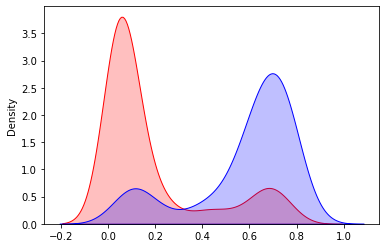

In [17]:
#Common support region
plot_non_treated = sns.kdeplot(non_treated, shade = True, color = "r")
plot_treated = sns.kdeplot(treated, shade = True, color = "b")

Our interest here is matching the overlapping regions.

# PSM

In [18]:
#isolating Y, treat and confounders

# ".values" will return the array of values instead of a dataframe
treat = dataset.iloc[:, 0].values 
confounders= dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [19]:
#import causal inference library
#pip install CausalInference
from causalinference import CausalModel

propensity_model = CausalModel(Y, treat, confounders)
propensity_model.est_propensity_s()
propensity_model.est_via_matching(bias_adj = True)

C:\Users\ariel\anaconda3\envs\RPy\lib\site-packages\causalinference\estimators\matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


In [20]:
print(propensity_model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -444.122   1599.269     -0.278      0.781  -3578.690   2690.446
           ATC   -722.201   2021.846     -0.357      0.721  -4685.019   3240.617
           ATT    200.720   1779.421      0.113      0.910  -3286.945   3688.385



In [21]:
print(propensity_model.propensity)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept    -21.096      2.687     -7.851      0.000    -26.363    -15.829
            X2      2.635      0.367      7.179      0.000      1.915      3.354
            X4     -3.026      0.717     -4.222      0.000     -4.431     -1.621
            X6      0.000      0.000      0.847      0.397     -0.000      0.000
            X3      5.137      1.845      2.785      0.005      1.521      8.753
            X1      1.175      0.316      3.713      0.000      0.555      1.796
            X5      0.376      0.450      0.836      0.403     -0.505      1.258
            X7      0.000      0.000      1.496      0.135     -0.000      0.000
            X0      0.988      0.142      6.983      0.000      0.711      1.266
         X0*X0     -0.015      0.002     -6.524      0.000     -0.